In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data1=pd.read_csv("cardata.csv")

In [3]:
data1.shape

(301, 9)

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data1.drop("Owner",axis=1,inplace=True)

In [7]:
data1.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
dtype: int64

In [8]:
data1.Year.value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [9]:
data1["Age"]=2023-data1["Year"]
data1.drop("Year",axis=1,inplace=True)

In [10]:
data1.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [11]:
data1.drop('Car_Name', axis=1, inplace=True)

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Seller_Type    301 non-null    object 
 5   Transmission   301 non-null    object 
 6   Age            301 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 16.6+ KB


In [13]:
kolonlar = np.concatenate([data1.select_dtypes(exclude='object').columns.values])


In [14]:
data1.head(10)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,9
5,9.25,9.83,2071,Diesel,Dealer,Manual,5
6,6.75,8.12,18796,Petrol,Dealer,Manual,8
7,6.50,8.61,33429,Diesel,Dealer,Manual,8
8,8.75,8.89,20273,Diesel,Dealer,Manual,7
9,7.45,8.92,42367,Diesel,Dealer,Manual,8


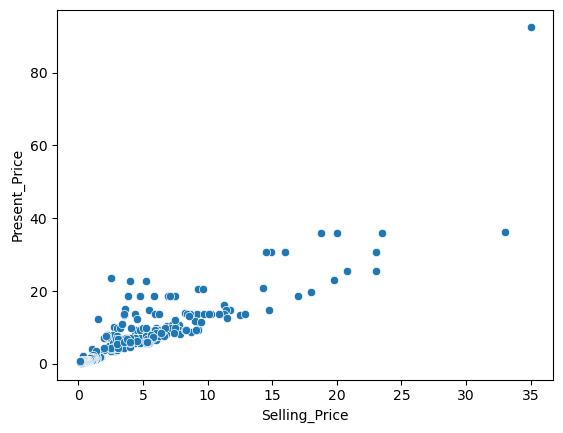

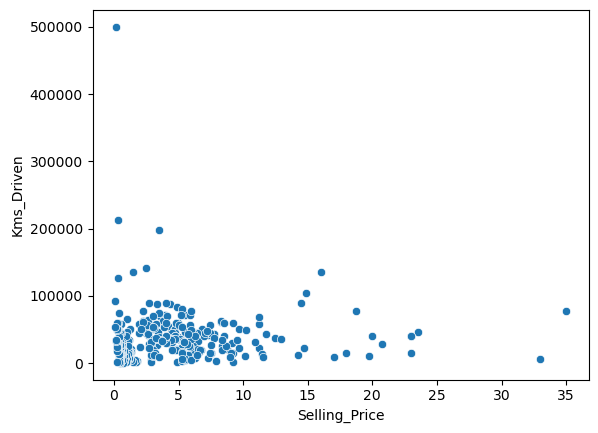

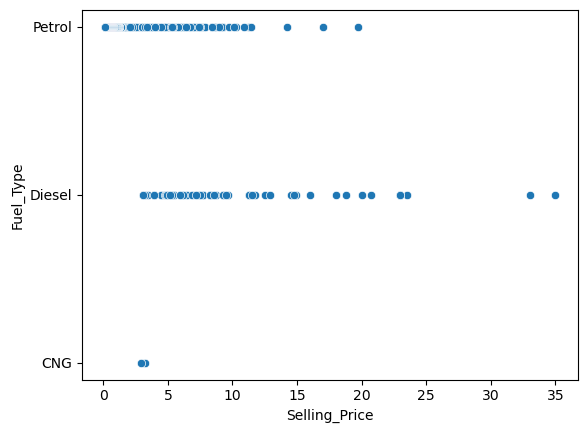

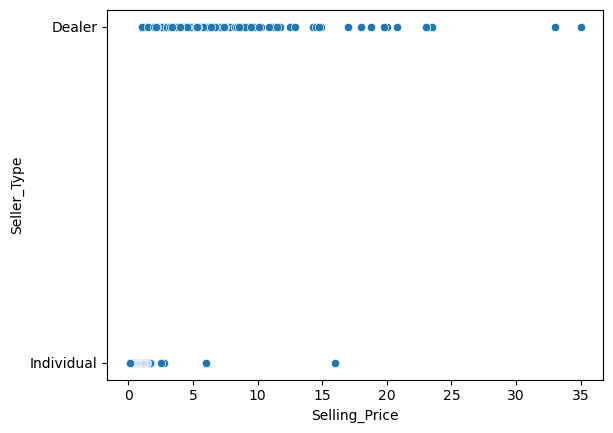

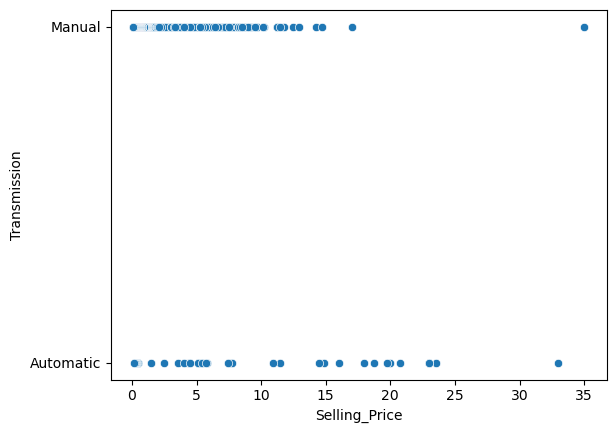

In [15]:
for i in data1.columns[1:-1]:
    sns.scatterplot(data=data1,x="Selling_Price",y=i)
    plt.show()

In [16]:
kolon1std=data1.Selling_Price.std()

In [17]:
kolon1avg=data1.Selling_Price.mean()

In [18]:
threesigmaplus=kolon1avg+(3*kolon1std)
threesigmaminus=kolon1avg-(3*kolon1std)

In [19]:
data1["Selling_Price"][(data1["Selling_Price"]>threesigmaplus) | (data1["Selling_Price"]<threesigmaminus)].index

Int64Index([51, 59, 63, 64, 82, 86, 93, 96], dtype='int64')

In [20]:
for i in [51, 59, 63, 64, 82, 86, 93, 96]:
	data1.drop(i,axis=0,inplace=True)

In [21]:
kolon1std=data1.Present_Price.std()
kolon1avg=data1.Present_Price.mean()
threesigmaplus=kolon1avg+(3*kolon1std)
threesigmaminus=kolon1avg-(3*kolon1std)
data1["Present_Price"][(data1["Present_Price"]>threesigmaplus) | (data1["Present_Price"]<threesigmaminus)].index

Int64Index([50, 53, 62, 79], dtype='int64')

In [22]:
for i in [50, 53, 62, 79]:
	data1.drop(i,axis=0,inplace=True)

In [23]:
kolon1std=data1.Kms_Driven.std()
kolon1avg=data1.Kms_Driven.mean()
threesigmaplus=kolon1avg+(3*kolon1std)
threesigmaminus=kolon1avg-(3*kolon1std)
data1["Kms_Driven"][(data1["Kms_Driven"]>threesigmaplus) | (data1["Kms_Driven"]<threesigmaminus)].index

Int64Index([84, 179, 196], dtype='int64')

In [24]:
for i in [37, 77, 84, 85, 179]:
	data1.drop(i,axis=0,inplace=True)

In [25]:
kolon1std=data1.Age.std()
kolon1avg=data1.Age.mean()
threesigmaplus=kolon1avg+(3*kolon1std)
threesigmaminus=kolon1avg-(3*kolon1std)
data1["Age"][(data1["Age"]>threesigmaplus) | (data1["Age"]<threesigmaminus)].index

Int64Index([39, 54, 92, 189], dtype='int64')

In [26]:
for i in [39, 54, 92, 189]:
	data1.drop(i,axis=0,inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder nesnesi oluşturma
le = LabelEncoder()

# Veriyi dönüştürme
data1["Selling_Price"]= le.fit_transform(data1["Selling_Price"])

In [28]:
data1["Present_Price"]= le.fit_transform(data1["Present_Price"])
data1["Kms_Driven"]= le.fit_transform(data1["Kms_Driven"])

In [29]:
ss = StandardScaler()
data1["Selling_Price"] = ss.fit_transform(data1[["Selling_Price"]])
data1["Present_Price"] = ss.fit_transform(data1[["Present_Price"]])
data1["Kms_Driven"] = ss.fit_transform(data1[["Kms_Driven"]])
data1["Age"] = ss.fit_transform(data1[["Age"]])

In [30]:
data1=pd.get_dummies(data1, columns=['Fuel_Type'])

In [31]:
data1=pd.get_dummies(data1, columns=['Seller_Type'])

In [32]:
data1= pd.get_dummies(data1, columns=['Transmission'])

In [33]:
data1.head()

,Selling_Price,Present_Price,Kms_Driven,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,-0.107417,-0.202076,-0.158848,-0.048573,0,0,1,1,0,0,1
1,0.327738,0.968401,0.728482,0.351441,0,1,0,1,0,0,1
2,1.198048,1.018209,-1.268010,-1.248617,0,0,1,1,0,0,1
3,-0.286599,-0.401307,-1.415899,1.151471,0,0,1,1,0,0,1
4,0.276543,0.196384,0.709996,-0.048573,0,1,0,1,0,0,1


In [34]:
y=data1.iloc[:,0].values
X=data1.iloc[:,1:].values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [50]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [51]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)


In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
from sklearn.metrics import r2_score

In [54]:
y_predict=lr.predict(X_test)

In [55]:
r2_score(y_test, y_predict)

0.9361332648974261